# Palmer Archipelago (Antarctica) penguin data

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.svm import SVC

## Leitura do Dataset

In [2]:
#Leitura do dataset
penguins = pd.read_csv("Datasets/penguins_size.csv")
#Observar algumas linhas do dataset
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploração dos dados

In [3]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

* **species**: espécies de pinguins
* **culmen_length_mm**: comprimento do *culmen* em milímetros
* **culmen_depth_mm**: comprimento do *culmen* em milímetros
* **flipper_length_mm**: comprimento da barbatana em milímetros
* **body_mass_g**: massa corporal em gramas
* **island**: nome da ilha no Arquipélago Palmer (Antártica)
* **sex**: sexo do pinguim

![](https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=4096x4096)



In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


É possível perceber que existem valores em falta no *dataset*.

In [5]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


A tabela acima apresenta valores como o nº de entradas, média, desvio padrão, etc., das colunas com valores numéricos.

Analisando os valores da coluna *culmen_length_mm*, conclui-se que existem 342 entradas, que a média do comprimento dos bicos dos pinguins da amostra é ~43.92mm, tem um desvio médio de ~5.46mm, que o valor mínimo e máximo medidos são, respetivamente, 32.1mm e 59.6mm. Assim como os valores dos percentis 25, 50 e 70. 


### Verificação da existência de valores em falta

In [6]:
#Verificar quais colunas têm valores em falta
penguins.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

<AxesSubplot:>

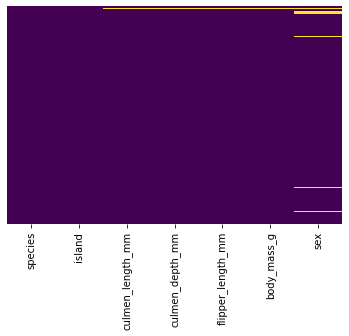

In [7]:
sns.heatmap(penguins.isnull(), yticklabels=False, cbar=False, cmap='viridis')

O gráfico acima permite visualisar em que *features* existem dados em falta no *dataset*.

In [8]:
#Verificar quantos valores em falta existem
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Podemos verificar que nas colunas *culmen_length_mm*, *culmen_depth_mm*, *flipper_length_mm*, *body_mass_g* têm 2 valores em falta, enquanto a coluna *sex* tem 10.

In [9]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Valores únicos

Verificação dos valores únicos para as *features* categóricas.

In [10]:
print(penguins['species'].unique())
print(penguins['island'].unique())
print(penguins['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' nan '.']


* Existem 3 espécies de pinguins: **Adelie**, **Chinstrap** e **Gentoo**
* Existem 2 ilhas no Arquipélago: **Torgersen**, **Biscoe** e **Dream**

### Groupby

In [11]:
penguins.groupby(by="species").mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


Na tabela acima podemos ver os valores médios das 4 colunas com valores númericos, para cada espécie de pinguim.

In [12]:
penguins.groupby(by=['island','species']).mean()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
island    species                                                           
Biscoe    Adelie            38.975000        18.370455         188.795455   
          Gentoo            47.504878        14.982114         217.186992   
Dream     Adelie            38.501786        18.251786         189.732143   
          Chinstrap         48.833824        18.420588         195.823529   
Torgersen Adelie            38.950980        18.429412         191.196078   

                     body_mass_g  
island    species                 
Biscoe    Adelie     3709.659091  
          Gentoo     5076.016260  
Dream     Adelie     3688.392857  
          Chinstrap  3733.088235  
Torgersen Adelie     3706.372549

Verificamos que:
* a espécie Gentoo apenas existe na ilha Biscoe;
* a espécie Chinstrap apenas existe na ilha Dream;
* a espécie Adelie está presente em todas as ilhas.

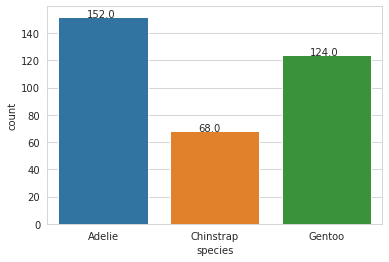

In [13]:
sns.set_style('whitegrid')
label = 'species'
ax = sns.countplot(x=label, data = penguins)
for p in ax.patches: ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Verificamos que existem muitos menos pinguins Chinstrap do que pinguins das outras espécies

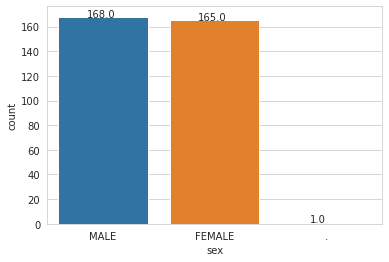

In [14]:
sns.set_style('whitegrid')
label = 'sex'
ax = sns.countplot(x=label, data = penguins)
for p in ax.patches: ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Verificamos que a quantidade de pinguins do sexo masculino e feminimo está equilibrada.

## Distribuição estatística

* ### culmen_length_mm

<AxesSubplot:xlabel='culmen_length_mm', ylabel='Count'>

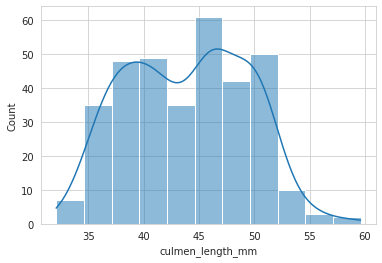

In [15]:
sns.histplot(penguins['culmen_length_mm'], kde=True)

In [16]:
print("Skewness: %f" % penguins['culmen_length_mm'].skew())
print("Kurtosis: %f" % penguins['culmen_length_mm'].kurt())

Skewness: 0.053118
Kurtosis: -0.876027


<AxesSubplot:xlabel='culmen_length_mm', ylabel='Count'>

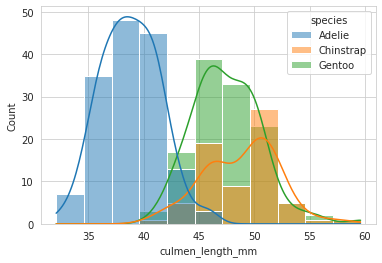

In [17]:
sns.histplot(data=penguins, x='culmen_length_mm', hue='species', kde=True)

* ### culmen_depth_mm

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='Count'>

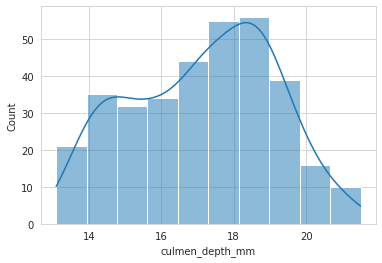

In [18]:
sns.histplot(penguins['culmen_depth_mm'], kde=True)

In [19]:
print("Skewness: %f" % penguins['culmen_depth_mm'].skew())
print("Kurtosis: %f" % penguins['culmen_depth_mm'].kurt())

Skewness: -0.143465
Kurtosis: -0.906866


<AxesSubplot:xlabel='culmen_depth_mm', ylabel='Count'>

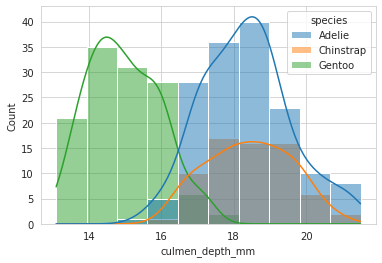

In [20]:
sns.histplot(data=penguins, x='culmen_depth_mm', hue='species', kde=True)

* ### flipper_length_mm

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

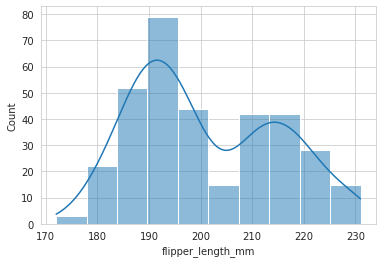

In [21]:
sns.histplot(penguins['flipper_length_mm'], kde=True)

In [22]:
print("Skewness: %f" % penguins['flipper_length_mm'].skew())
print("Kurtosis: %f" % penguins['flipper_length_mm'].kurt())

Skewness: 0.345682
Kurtosis: -0.984273


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

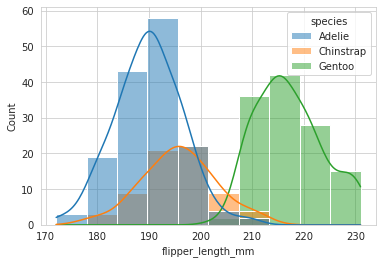

In [23]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', kde=True)

* ### body_mass_g

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

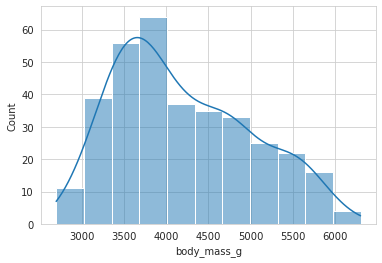

In [24]:
sns.histplot(penguins['body_mass_g'], kde=True)

In [25]:
print("Skewness: %f" % penguins['body_mass_g'].skew())
print("Kurtosis: %f" % penguins['body_mass_g'].kurt())

Skewness: 0.470329
Kurtosis: -0.719222


<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

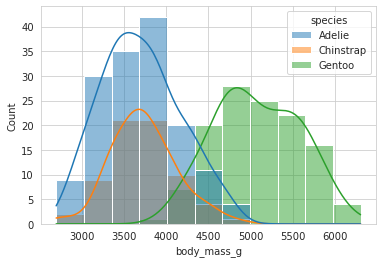

In [26]:
sns.histplot(data=penguins, x='body_mass_g', hue='species', kde=True)

## Outliers

* ### culmen_length_mm

<AxesSubplot:xlabel='culmen_length_mm'>

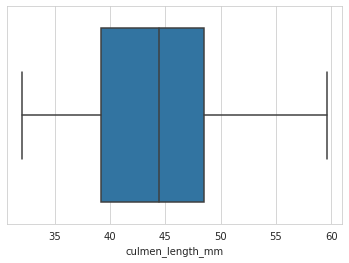

In [27]:
sns.boxplot(x=penguins['culmen_length_mm'])

<AxesSubplot:xlabel='culmen_length_mm', ylabel='species'>

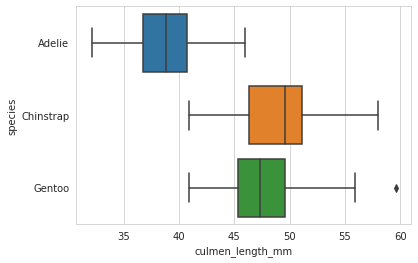

In [28]:
sns.boxplot(x=penguins['culmen_length_mm'], y=penguins["species"])

Apesar de na *boxplot* da *culmen_length_mm* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existe um outlier nos pinguins da espécie Gentoo**.

* ### culmen_depth_mm

<AxesSubplot:xlabel='culmen_depth_mm'>

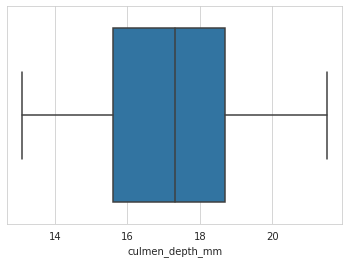

In [29]:
sns.boxplot(x=penguins['culmen_depth_mm'])

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='species'>

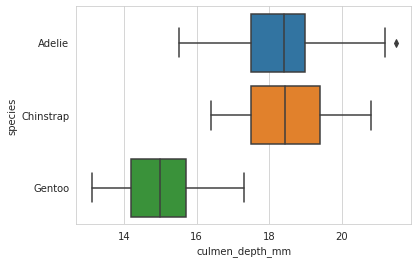

In [30]:
sns.boxplot(x=penguins['culmen_depth_mm'], y=penguins['species'])

Apesar de na *boxplot* da *culmen_depth_mm* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existe um outlier nos pinguins da espécie Adelie**.

* ### flipper_length_mm

<AxesSubplot:xlabel='flipper_length_mm'>

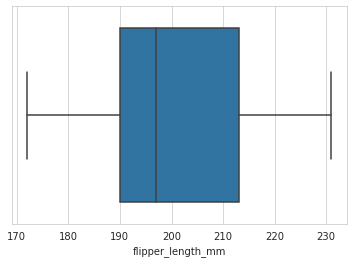

In [31]:
sns.boxplot(x=penguins['flipper_length_mm'])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

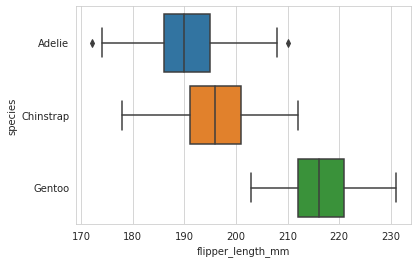

In [32]:
sns.boxplot(x=penguins['flipper_length_mm'], y=penguins['species'])

Apesar de na *boxplot* da *flipper_length_mm* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existem dois outliers nos pinguins da espécie Adelie**.

* ### body_mass_g

<AxesSubplot:xlabel='body_mass_g'>

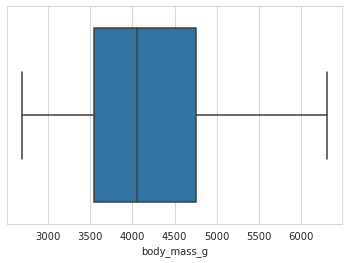

In [33]:
sns.boxplot(x=penguins['body_mass_g'])

<AxesSubplot:xlabel='body_mass_g', ylabel='species'>

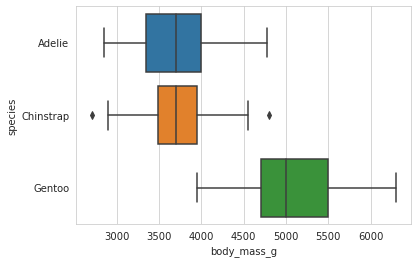

In [34]:
sns.boxplot(x=penguins['body_mass_g'], y=penguins['species'])

Apesar de na *boxplot* da *body_mass_g* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existem dois outliers nos pinguins da espécie Chinstrap**.

### Scatter plots

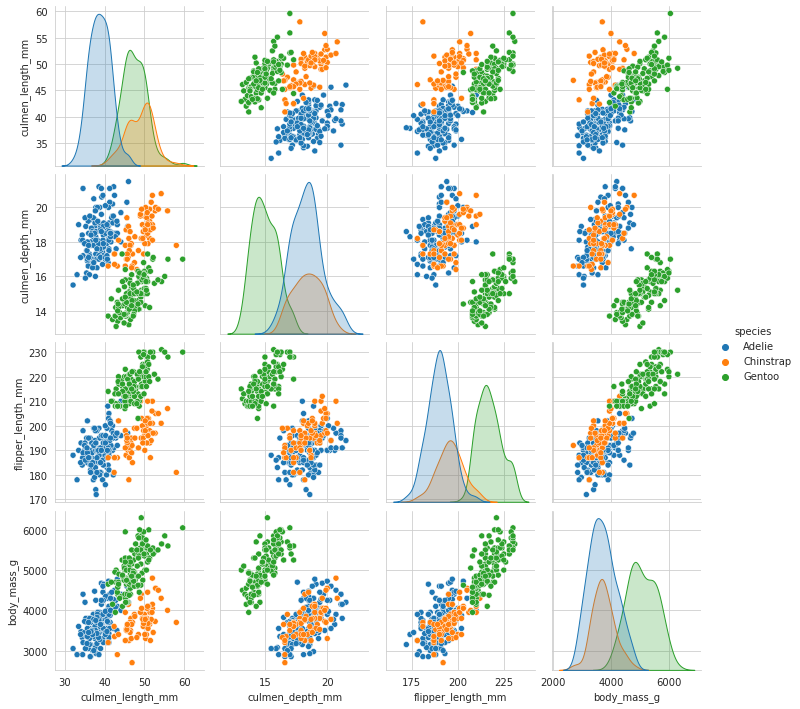

In [35]:
sns.pairplot(penguins, hue='species')

Nalguns dos gráficos, como por exemplo no que **x='culmen_depth_mm' e y='body_mass_g'**, vemos que **os valores das espécies Adelie e Chinstrap são muito semelhantes**.

No entanto existem gráficos, como o em que **x='culmen_length_mm' e y='body_mass_g'**, em que verificamos que **existe alguma distinção dos valores para as várias espécies de pinguins**.

### Matriz de correlação

<AxesSubplot:>

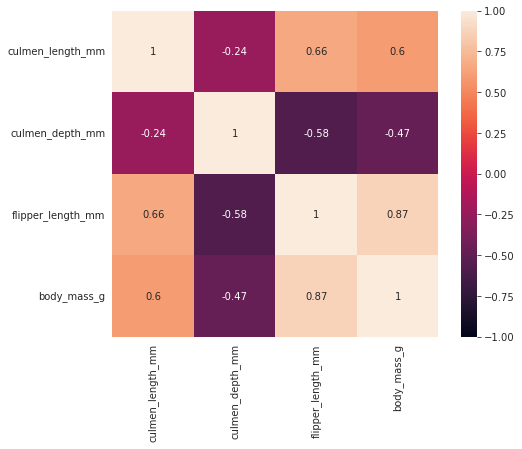

In [36]:
corr_matrix = penguins.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True,annot=True)

Como podemos ver analisando a matriz de correlação, **existem 2 atributos, 'flipper_length_mm' e 'body_mass_g', que apresentam correlação elevada.** Ou seja, com o aumento da massa corporal do pinguim, observa-se que o comprimento das suas *flippers*

## Preparação dos dados

### Tratamento dos valores em falta

In [37]:
#Preencher os missing values com a média da espécie a que pertence


penguins['culmen_length_mm'] = penguins['culmen_length_mm'].fillna(penguins.groupby('species')['culmen_length_mm'].transform('mean'))

penguins['culmen_depth_mm'] = penguins['culmen_depth_mm'].fillna(penguins.groupby('species')['culmen_depth_mm'].transform('mean'))

penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(penguins.groupby('species')['flipper_length_mm'].transform('mean'))

penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins.groupby('species')['body_mass_g'].transform('mean'))

penguins["sex"]=penguins["sex"].fillna(method='bfill')


In [38]:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Decidimos preencher os valores em falta das colunas numéricas com a média da espécie a que o pinguim pertence.

Para a coluna 'sex' utilizamos o método bfill para preencher os valores em falta.



Reparamos também que existia uma linha cujo valor na coluna 'sex' era ".", por isso alteramos esse valor para "MALE".

In [39]:
penguins.loc[penguins['sex'] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [40]:
#apagar a entrada que no atributo 'sex' tem "."
penguins.loc[penguins["sex"] == ".", ["sex"]] = "MALE"

In [41]:
penguins.loc[penguins["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


### *One-hot encoding*

In [42]:
one_hot_sex = pd.get_dummies(penguins['sex'])
#one_hot_species = pd.get_dummies(penguins['species'])
one_hot_island = pd.get_dummies(penguins['island'])

penguins = pd.concat([penguins,one_hot_sex,one_hot_island], axis=1)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,FEMALE,MALE,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,MALE,0,1,0,0,1
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,FEMALE,1,0,0,0,1
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,FEMALE,1,0,0,0,1
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,FEMALE,1,0,0,0,1
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,FEMALE,1,0,0,0,1


In [43]:
test = penguins.drop(columns=['sex','species','island','MALE'])


In [44]:
test.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,Biscoe,Dream,Torgersen
0,39.100000,18.700000,181.000000,3750.000000,0,0,0,1
1,39.500000,17.400000,186.000000,3800.000000,1,0,0,1
2,40.300000,18.000000,195.000000,3250.000000,1,0,0,1
3,38.791391,18.346358,189.953642,3700.662252,1,0,0,1
4,36.700000,19.300000,193.000000,3450.000000,1,0,0,1


# Clustering



## KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(test)

In [ ]:
kmeans.labels_

In [ ]:
y_pred = kmeans.predict(test)
y_pred

In [ ]:
penguins.species

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder= LabelEncoder()
y = labelencoder.fit_transform(penguins['species'])
y

In [ ]:
y_pred = np.where(y_pred==0, 10, y_pred)
y_pred = np.where(y_pred==1, 0, y_pred)
y_pred = np.where(y_pred==10, 1, y_pred)

y_pred = np.where(y_pred==1, 10, y_pred)
y_pred = np.where(y_pred==2, 1, y_pred)
y_pred = np.where(y_pred==10, 2, y_pred)
y_pred





In [ ]:
print(confusion_matrix(y, y_pred))

In [ ]:
print(classification_report(y, y_pred))

## KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=2021)
kmedoids.fit(test)

In [ ]:
kmedoids.labels_

In [ ]:
y

In [ ]:
y_pred = kmedoids.predict(test)
y_pred

In [ ]:
print(confusion_matrix(y, y_pred))

In [ ]:
print(classification_report(y, y_pred))

Acho que faz sentido estarmos a ver estes valores pq se formos ver ao pairplot, muitas vezes algumas das especies se misturam.

# Decision Tree

In [45]:
x = penguins.drop(columns=['sex','species','island','MALE'])
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,Biscoe,Dream,Torgersen
0,39.100000,18.700000,181.000000,3750.000000,0,0,0,1
1,39.500000,17.400000,186.000000,3800.000000,1,0,0,1
2,40.300000,18.000000,195.000000,3250.000000,1,0,0,1
3,38.791391,18.346358,189.953642,3700.662252,1,0,0,1
4,36.700000,19.300000,193.000000,3450.000000,1,0,0,1
...,...,...,...,...,...,...,...,...
339,47.504878,14.982114,217.186992,5076.016260,1,1,0,0
340,46.800000,14.300000,215.000000,4850.000000,1,1,0,0
341,50.400000,15.700000,222.000000,5750.000000,0,1,0,0
342,45.200000,14.800000,212.000000,5200.000000,1,1,0,0


In [46]:
y = penguins['species'].to_frame()
y

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)

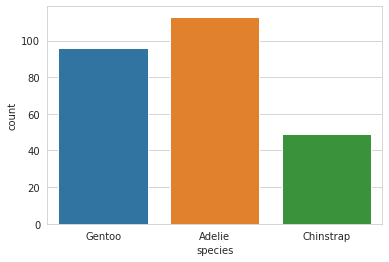

In [48]:
sns.set_style('whitegrid')
label = 'species'
ax = sns.countplot(x=label, data = y_train)
plt.show()

In [ ]:
sns.set_style('whitegrid')
label = 'species'
ax = sns.countplot(x=label, data = y_test)
plt.show()

In [65]:
clf = DecisionTreeClassifier(random_state=2021) 
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [66]:
predictions= clf.predict(x_test)
predictions

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Ge

In [67]:
cm = confusion_matrix(y_test, predictions)
cm

array([[39,  0,  0],
       [ 5, 14,  0],
       [ 0,  0, 28]])

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.89      1.00      0.94        39
   Chinstrap       1.00      0.74      0.85        19
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.94        86
   macro avg       0.96      0.91      0.93        86
weighted avg       0.95      0.94      0.94        86



In [69]:
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5,6,7,8,9,10]

#param_grid = {'criterion':criterion, 'max_depth':max_depth}
#grid = GridSearchCV(DecisionTreeClassifier(random_state=2021),param_grid,refit=True,verbose=3)
#grid.fit(x_train, y_train)

In [70]:
#grid.best_params_

In [71]:
#grid_predictions = grid.predict(x_test)
#print(classification_report(y_test,grid_predictions))

## Regressão Logistica

In [72]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train, np.ravel(y_train))

LogisticRegression(max_iter=1000)

In [73]:
predictions = logmodel.predict(x_test)

In [74]:
cm = confusion_matrix(y_test, predictions)
cm

array([[39,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 28]])

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        39
   Chinstrap       1.00      0.95      0.97        19
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



## Support Vector Machine

In [49]:
model = SVC(random_state = 2021)
model.fit(x_train, np.ravel(y_train))

SVC(random_state=2021)

In [50]:
predictions = model.predict(x_test)

In [51]:
cm = confusion_matrix(y_test, predictions)
cm

array([[39,  0,  0],
       [18,  0,  1],
       [ 4,  0, 24]])

In [52]:
print(classification_report(y_test, predictions, labels=np.unique(predictions)))

              precision    recall  f1-score   support

      Adelie       0.64      1.00      0.78        39
      Gentoo       0.96      0.86      0.91        28

   micro avg       0.73      0.94      0.82        67
   macro avg       0.80      0.93      0.84        67
weighted avg       0.77      0.94      0.83        67



In [53]:
predictions

array(['Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo'], dtype=object)

In [54]:
np.ravel(y_test)

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie'

nnc está a prever nenhum piguim da especie Chinstrap

In [76]:
param_grid = {'C': [0.1,1,10,100],'gamma':[0.01,0.001,0.0001],'kernel':['rbf', 'sigmoid', 'linear']}
grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True,verbose=3)
grid.fit(x_train,np.ravel(y_train))



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.423 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.442 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.442 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.451 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.431 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.423 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.442 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.442 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.451 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.431 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=3)

In [77]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [78]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        39
   Chinstrap       1.00      0.95      0.97        19
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



In [79]:
grid_predictions

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', '

In [80]:
cm = confusion_matrix(y_test, grid_predictions)
cm

array([[39,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 28]])

Tanto neste modelo como no de regressão logística, a prediction errada é sempre a da segunda linha. Em ambos é classificada como sendo da primeira coluna.